In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
data = pd.read_csv("index_stocks.csv", header=[0, 1], parse_dates=[0], index_col=[0])
data.head()

Adj Close                                                \
                  AMZN          BA        DIS         IBM         KO   
Date                                                                   
2013-12-31  398.790009  116.654106  70.312157  126.471878  31.698837   
2014-01-02  397.970001  116.807961  70.192520  125.096375  31.200073   
2014-01-03  396.440002  117.619873  70.045273  125.844788  31.046604   
2014-01-06  393.630005  118.295074  69.778374  125.413277  30.900816   
2014-01-07  398.029999  120.089859  70.256958  127.914810  30.992889   

                            Close                                     ...  \
                 MSFT        AMZN          BA        DIS         IBM  ...   
Date                                                                  ...   
2013-12-31  32.012249  398.790009  136.490005  76.400002  179.321228  ...   
2014-01-02  31.798321  397.970001  136.669998  76.269997  177.370941  ...   
2014-01-03  31.584381  396.440002  137.619995  76.110001  178.432129  ...   
2014-01-06  30.916937  393.630005  138.410004  75.820000  177.820267  ...   
2014-01-07  31.156538  398.029999  140.509995  76.339996  181.367111  ...   

                 Open                                     Volume           \
                  DIS         IBM         KO       MSFT     AMZN       BA   
Date                                                                        
2013-12-31  76.279999  178.288712  41.130001  37.400002  1996500  2096000   
2014-01-02  76.040001  178.977051  41.119999  37.349998  2137800  3366700   
2014-01-03  76.300003  177.657745  40.680000  37.200001  2210200  3177400   
2014-01-06  76.529999  178.919693  40.480000  36.849998  3170600  4196500   
2014-01-07  76.120003  178.193115  40.480000  36.330002  1916000  4238500   

                                                  
                DIS      IBM        KO      MSFT  
Date                                              
2013-12-31  4692300  3786206  11729200  17503500  
2014-01-02  5200900  4755639  12698600  30632200  
2014-01-03  4060700  4250107  10403400  31134800  
2014-01-06  6816200  4254919  11036300  43603700  
2014-01-07  4494900  6205186  11872300  35802800  

[5 rows x 36 columns]

In [3]:
close = data.Close
high = data.High
low = data.Low

In [4]:
def lookback_high_low(high, low, nbdays):
    
    return high.shift(1).rolling(nbdays).max(), low.shift(1).rolling(nbdays).min()
    

In [5]:
bhigh, blow = lookback_high_low(high, low, 50)

In [6]:
# Plot closing prices and highs and lows
df = pd.concat([bhigh.AMZN, blow.AMZN, close.AMZN], axis = 1)
df.columns = ["highs", "lows", "closes"]
df

,highs,lows,closes
Date,,,
2013-12-31,NaN,NaN,398.790009
2014-01-02,NaN,NaN,397.970001
2014-01-03,NaN,NaN,396.440002
2014-01-06,NaN,NaN,393.630005
2014-01-07,NaN,NaN,398.029999
...,...,...,...
2018-12-21,1858.560059,1420.000000,1377.449951
2018-12-24,1845.000000,1363.959961,1343.959961
2018-12-26,1845.000000,1307.000000,1470.900024


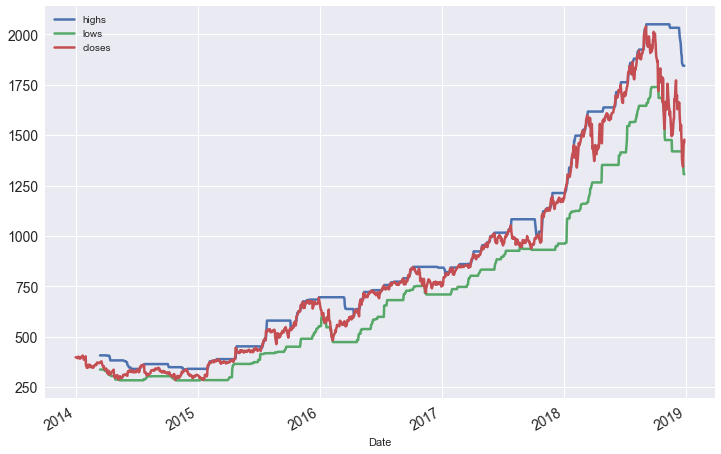

In [7]:
df.plot(figsize=(12, 8), fontsize=14, linewidth=2.5)
#plt.legend(["close", "high", "close"], fontsize=13)
plt.show()

In [8]:
# compute long and short signals
def long_short_signal(bhigh, blow, close):
    
    return (-1)*(blow > close).astype(int) + (bhigh < close).astype(int)



In [9]:
signals = long_short_signal(bhigh, blow, close)
signals

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,0,0,0,0,0,0
2014-01-02,0,0,0,0,0,0
2014-01-03,0,0,0,0,0,0
2014-01-06,0,0,0,0,0,0
2014-01-07,0,0,0,0,0,0
...,...,...,...,...,...,...
2018-12-21,-1,0,-1,-1,0,-1
2018-12-24,-1,-1,-1,-1,0,-1
2018-12-26,0,0,0,0,0,0


In [10]:
df_signal = pd.concat([signals.AMZN, close.AMZN], axis=1)
df_signal.columns = ["signals", "closes"]
df_signal

,signals,closes
Date,,
2013-12-31,0,398.790009
2014-01-02,0,397.970001
2014-01-03,0,396.440002
2014-01-06,0,393.630005
2014-01-07,0,398.029999
...,...,...
2018-12-21,-1,1377.449951
2018-12-24,-1,1343.959961
2018-12-26,0,1470.900024


In [11]:
#df.signal.S

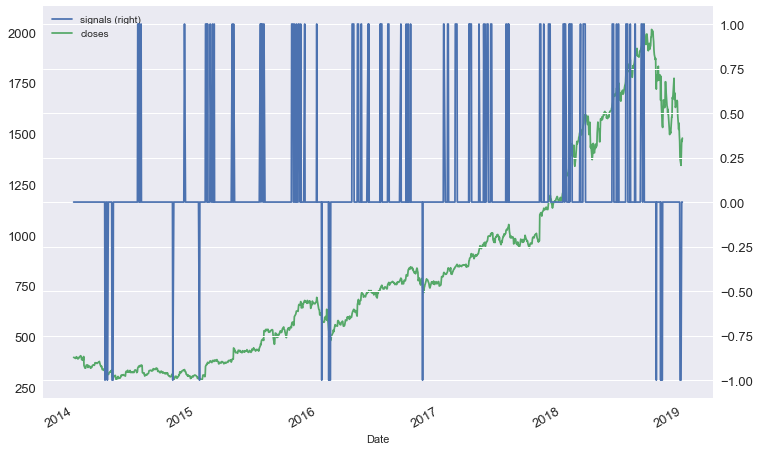

In [12]:
# plot the closing prices and the corresponding signals
df_signal.plot(figsize=(12, 8), fontsize=13, secondary_y='signals')
plt.show()
# to recheck later

In [13]:
def clear_signals(signals, window_size):
    """
    Clear out signals in a Series of just long or short signals.
    
    Remove the number of signals down to 1 within the window size time period.
    
    Parameters
    ----------
    signals : Pandas Series
        The long, short, or do nothing signals
    window_size : int
        The number of days to have a single signal       
    
    Returns
    -------
    signals : Pandas Series
        Signals with the signals removed from the window size
    """
    # Start with buffer of window size
    # This handles the edge case of calculating past_signal in the beginning
    clean_signals = [0]*window_size
    
    for signal_i, current_signal in enumerate(signals):
        # Check if there was a signal in the past window_size of days
        has_past_signal = bool(sum(clean_signals[signal_i:signal_i+window_size]))
        # Use the current signal if there's no past signal, else 0/False
        clean_signals.append(not has_past_signal and current_signal)
        
    # Remove buffer
    clean_signals = clean_signals[window_size:]

    # Return the signals as a Series of Ints
    return pd.Series(np.array(clean_signals).astype(int), signals.index)

def filter_signals(signals, lookahead_days):
    """
    Filter out signals in a DataFrame
    
    Parameters
    ----------
    signals: DataFrame
            The long, short, and do nothing signals for each ticker and date
    looahead_days: int
                The number of days to look ahead
    
    
    Returns
    -------
    filtered_signal : DataFrame
        The filtered long, short, and do nothing signals for each ticker and date
    
    """
    filtered_signal = signals.copy()
    long_position = (signals==1).astype(int)
    short_position = (signals==-1).astype(int)
    
    long_position = long_position.apply(lambda signals: clear_signals(signals, lookahead_days))
    short_position = short_position.apply(lambda signals: clear_signals(signals, lookahead_days))
    
    
   
    return long_position + short_position * (-1)
    

In [14]:
# define a function that filter the signal in 5, 10,  and 20 window days

def days_filtered(signals, day5=5, day10=10, day20=20):
    signal5 = filter_signals(signals, day5)
    signal10 = filter_signals(signals, day10)
    signal20 = filter_signals(signals, day20)
    
    return signal5, signal10, signal20



In [15]:
signal5, signal10, signal20 = days_filtered(signals)

In [16]:
filtered_df = pd.concat([close.AMZN, bhigh.AMZN, blow.AMZN, signal5.AMZN, signal10.AMZN, signal20.AMZN], axis=1)
filtered_df.columns = ["AMZN", "hAMZN", "lAMZN", "sgn5", "sgn10", "sgn20"]
filtered_df

,AMZN,hAMZN,lAMZN,sgn5,sgn10,sgn20
Date,,,,,,
2013-12-31,398.790009,NaN,NaN,0,0,0
2014-01-02,397.970001,NaN,NaN,0,0,0
2014-01-03,396.440002,NaN,NaN,0,0,0
2014-01-06,393.630005,NaN,NaN,0,0,0
2014-01-07,398.029999,NaN,NaN,0,0,0
...,...,...,...,...,...,...
2018-12-21,1377.449951,1858.560059,1420.000000,-1,-1,-1
2018-12-24,1343.959961,1845.000000,1363.959961,0,0,0
2018-12-26,1470.900024,1845.000000,1307.000000,0,0,0


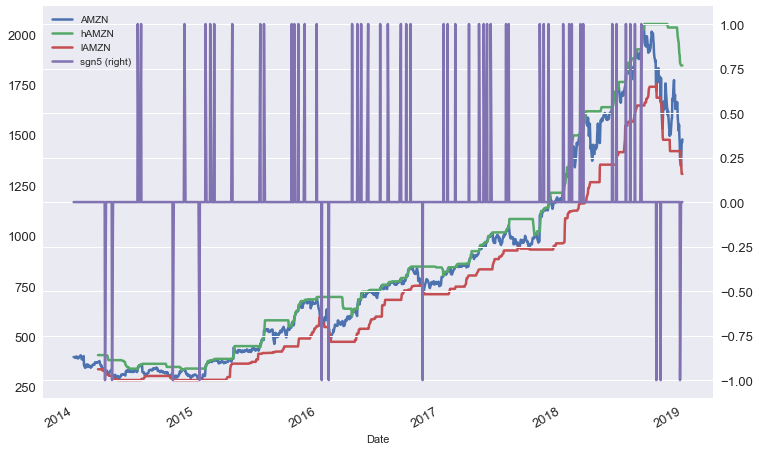

In [17]:
filtered_df.loc[:,["AMZN", "hAMZN", "lAMZN", "sgn5"]].plot(figsize=(12, 8), fontsize=13, linewidth=2.5, secondary_y="sgn5")
plt.show()

<AxesSubplot:xlabel='Date'>

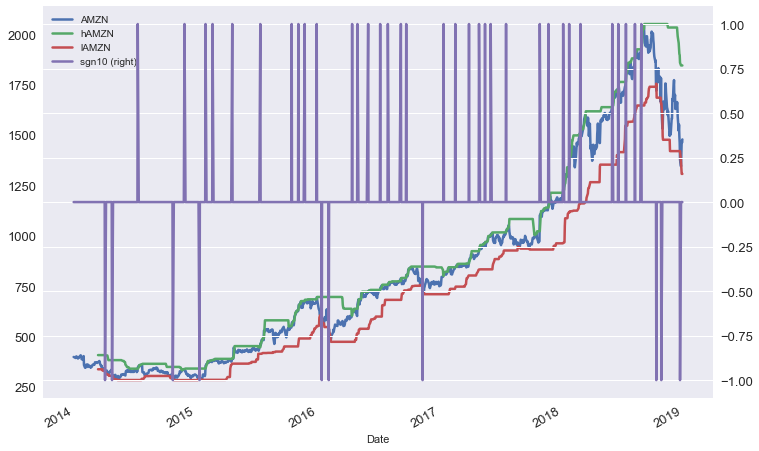

In [18]:
filtered_df.loc[:,["AMZN", "hAMZN", "lAMZN", "sgn10"]].plot(figsize=(12, 8), fontsize=13, linewidth=2.5, secondary_y="sgn10")

<AxesSubplot:xlabel='Date'>

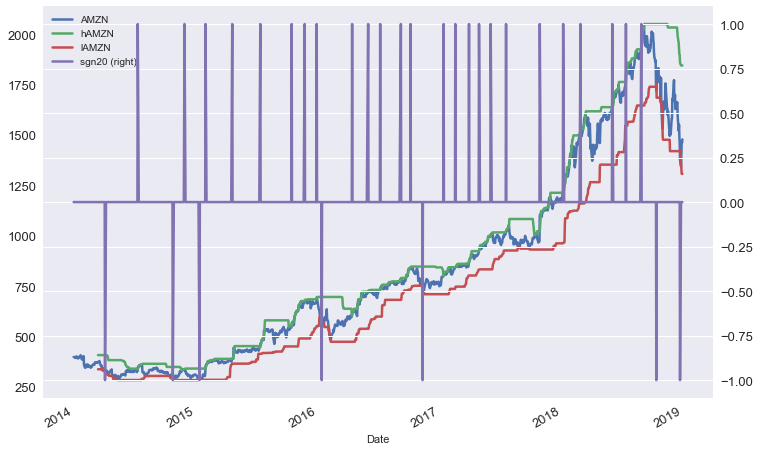

In [19]:
filtered_df.loc[:,["AMZN", "hAMZN", "lAMZN", "sgn20"]].plot(figsize=(12, 8), fontsize=13, linewidth=2.5, secondary_y="sgn20")


## Lookahead close prices

Now we can evaluate how many days to wait until we long or short a position given our selected stocks. That means, we implement a function to get the close prices ahead of time.



In [20]:
def get_lookahead_prices(close, lookahead_days):
    
    return close.shift(-lookahead_days)


## View data
Now, we are going to generate the lookahead closing prices for 5, 10, and 20 days

In [21]:
lookahead_price_df = pd.concat([close.AMZN, get_lookahead_prices(close, 5).AMZN, get_lookahead_prices(close, 10).AMZN, get_lookahead_prices(close, 20).AMZN], axis=1)
lookahead_price_df.columns = [ "AMZN","day5_price", "day10_price", "day20_price"]
lookahead_price_df.head()

,AMZN,day5_price,day10_price,day20_price
Date,,,,
2013-12-31,398.790009,401.920013,395.869995,403.010010
2014-01-02,397.970001,401.010010,395.799988,358.690002
2014-01-03,396.440002,397.660004,399.609985,346.149994
2014-01-06,393.630005,390.980011,407.049988,347.950012
2014-01-07,398.029999,397.540009,404.540009,346.450012


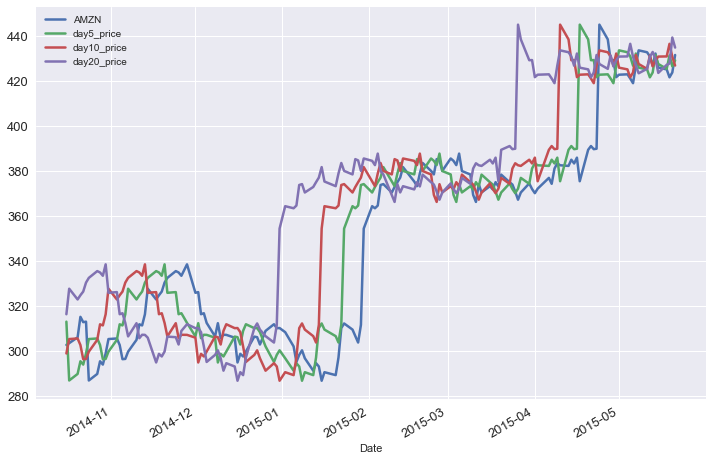

In [22]:
lookahead_price_df.iloc[200:350].plot(figsize=(12, 8), fontsize=13, linewidth=2.5)
plt.show()

# Lookahead price returns
Implement a funtion to generate the log price return between the closing price and the lookahead price.

In [23]:
def lookahead_return(close, lookahead_price):
    
    return np.log(lookahead_price.div(close))
    

## View data
We will view the lookahead returns for the different chosen day window ahead.

In [24]:
ret_df = pd.concat([close.AMZN, lookahead_return(close, get_lookahead_prices(close, 5)).AMZN, lookahead_return(close, get_lookahead_prices(close, 10)).AMZN, lookahead_return(close, get_lookahead_prices(close, 20)).AMZN], axis=1)
ret_df.columns = ["AMZN", "ret_5", "ret_10", "ret_20"]
ret_df.head()

,AMZN,ret_5,ret_10,ret_20
Date,,,,
2013-12-31,398.790009,0.007818,-0.007349,0.010526
2014-01-02,397.970001,0.007610,-0.005468,-0.103918
2014-01-03,396.440002,0.003073,0.007964,-0.135653
2014-01-06,393.630005,-0.006755,0.033525,-0.123353
2014-01-07,398.029999,-0.001232,0.016223,-0.138789


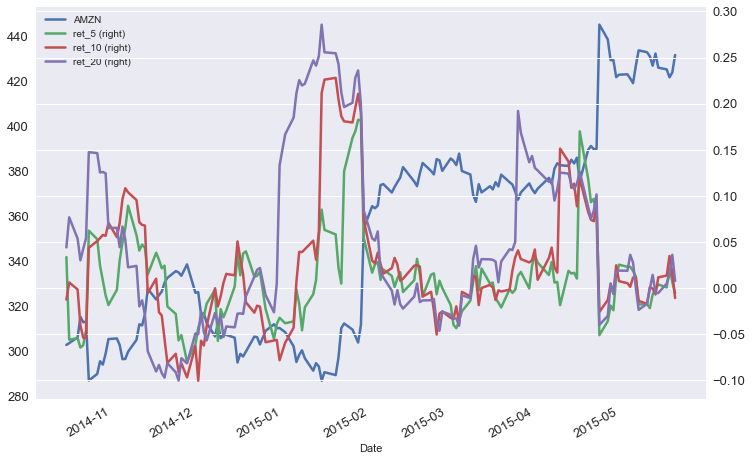

In [25]:
ret_df.iloc[200:350].plot(figsize=(12, 8), fontsize=13, linewidth=2.5, secondary_y=["ret_5", "ret_10", "ret_20"])
plt.show()

# Compute the signal returns
Using the price returns, generate signal returns



In [26]:
def get_signal_return(signal, price_return):
    
    return signal*price_return


In [27]:
snl_ret_5  = get_signal_return(signals, lookahead_return(close, get_lookahead_prices(close, 5)))
snl_ret_10  = get_signal_return(signals, lookahead_return(close, get_lookahead_prices(close, 10)))
snl_ret_20  = get_signal_return(signals, lookahead_return(close, get_lookahead_prices(close, 20)))

## View data: use case AMZN
Visual the signal, return and the closing price for the different day windows 

In [28]:
# 5 days
signal_return_5 = pd.concat([close.AMZN , signal5.AMZN, get_signal_return(signals, lookahead_return(close, get_lookahead_prices(close, 5))).AMZN], axis=1)
signal_return_5.columns = ["AMZN", "signal5", "signal_ret5"]
signal_return_5.head()

,AMZN,signal5,signal_ret5
Date,,,
2013-12-31,398.790009,0,0.0
2014-01-02,397.970001,0,0.0
2014-01-03,396.440002,0,0.0
2014-01-06,393.630005,0,-0.0
2014-01-07,398.029999,0,-0.0


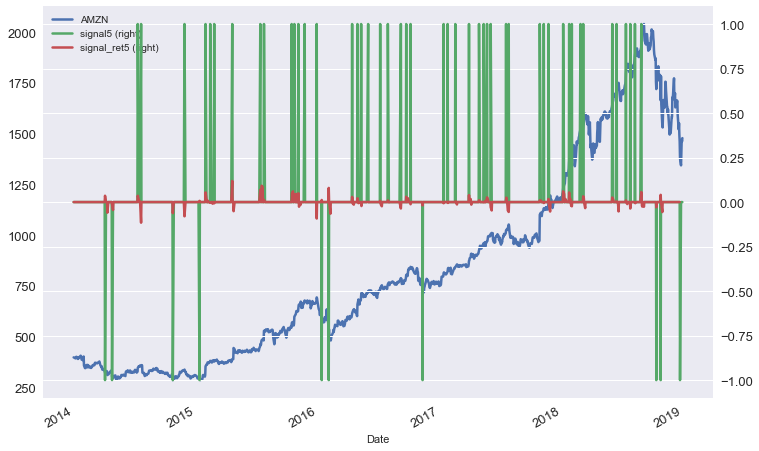

In [29]:
signal_return_5.plot(figsize=(12, 8), fontsize=13, linewidth=2.5, secondary_y=["signal5", "signal_ret5"])
plt.show()

In [30]:
# 10 days
signal_return_10 = pd.concat([close.AMZN , signal10.AMZN ,get_signal_return(signals, lookahead_return(close, get_lookahead_prices(close, 10))).AMZN], axis=1)
signal_return_10.columns = ["AMZN", "signal10", "signal_ret10"]
signal_return_10.head()

,AMZN,signal10,signal_ret10
Date,,,
2013-12-31,398.790009,0,-0.0
2014-01-02,397.970001,0,-0.0
2014-01-03,396.440002,0,0.0
2014-01-06,393.630005,0,0.0
2014-01-07,398.029999,0,0.0


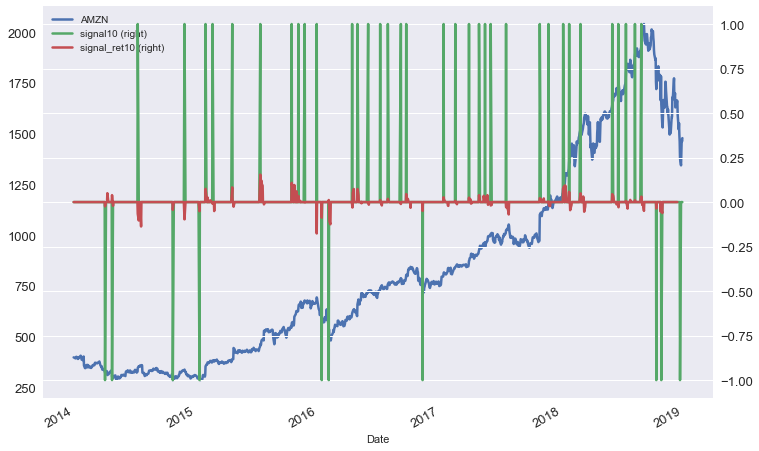

In [31]:
signal_return_10.plot(figsize=(12, 8), fontsize=13, linewidth=2.5, secondary_y=["signal10", "signal_ret10"])
plt.show()

In [32]:
# 20 days
signal_return_20 = pd.concat([close.AMZN , signal20.AMZN ,get_signal_return(signals, lookahead_return(close, get_lookahead_prices(close, 20))).AMZN], axis=1)
signal_return_20.columns = ["AMZN", "signal20", "signal_ret20"]
signal_return_20.head()

,AMZN,signal20,signal_ret20
Date,,,
2013-12-31,398.790009,0,0.0
2014-01-02,397.970001,0,-0.0
2014-01-03,396.440002,0,-0.0
2014-01-06,393.630005,0,-0.0
2014-01-07,398.029999,0,-0.0


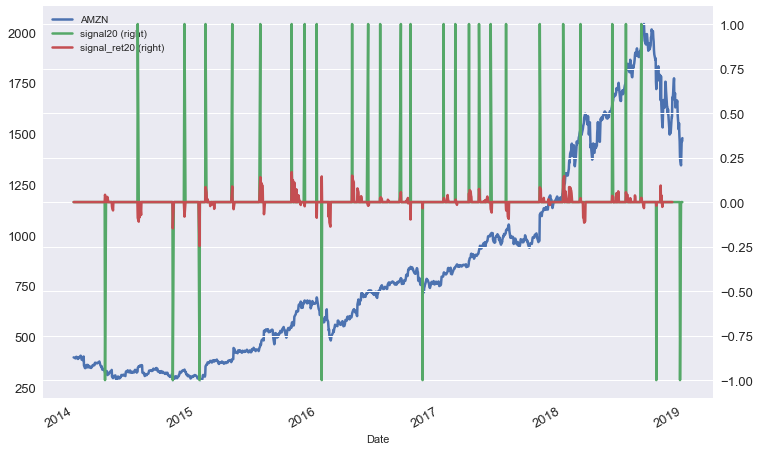

In [33]:
signal_return_20.plot(figsize=(12, 8), fontsize=13, linewidth=2.5, secondary_y=["signal20", "signal_ret20"])
plt.show()

# Histograms, normal distribution and QQplot

In [47]:
import scipy.stats as stats
from scipy.stats import norm


In [34]:
signal_list = [snl_ret_5, snl_ret_10, snl_ret_20]

In [59]:
def HistogramStockReturns(stack_signal_return, title):
    stack_signal_return = signal_list[0].stack()[signal_list[0].stack() !=0].dropna()
    stack_signal_return.hist(bins=100)
    plt.title(title)
    # normal distribution
    xmin = stack_signal_return.min()
    xmax = stack_signal_return.max()
    x = np.linspace(xmin, xmax, 1000)
    #data_5 = np.linspace(xmin, xmax, 50)
    mu, std = norm.fit(stack_signal_return)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, c='r', linewidth=2.5)
    plt.show()
    stats.probplot(stack_signal_return, dist='norm', plot=plt);

    

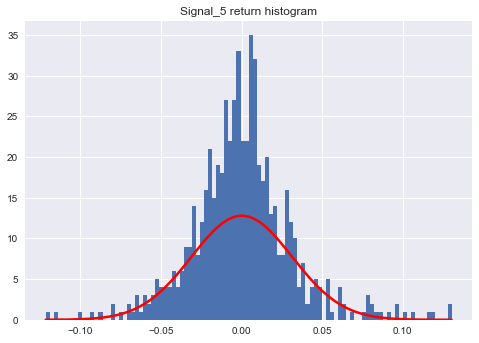

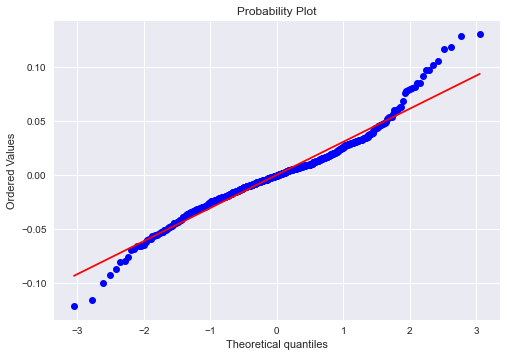

In [60]:
HistogramStockReturns(signal_list[0], "Signal_5 return histogram")

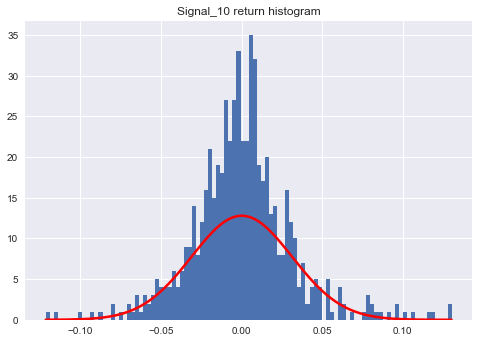

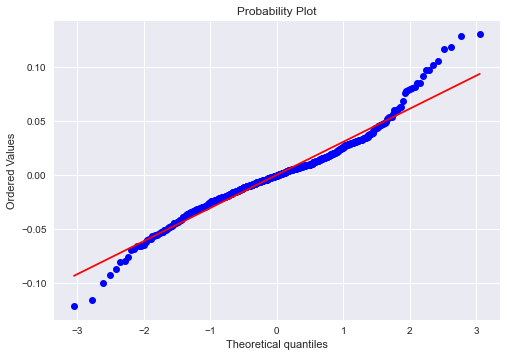

In [62]:
HistogramStockReturns(signal_list[1], "Signal_10 return histogram")

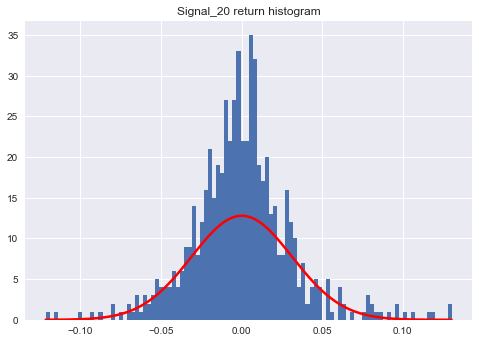

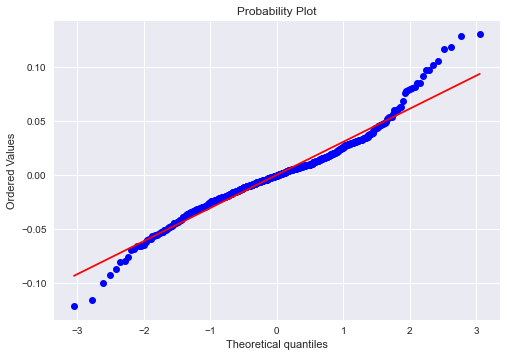

In [63]:
HistogramStockReturns(signal_list[2], "Signal_20 return histogram")

# Kolmogorov Smirnov Test
We want to find the stocks that are causing the outlying returns


In [64]:
#filter out returns that don't have a long or short signal
long_short_signal_returns_5 = snl_ret_5[signal5!=0].stack()
long_short_signal_returns_10 = snl_ret_10[signal10!=0].stack()
long_short_signal_returns_20 = snl_ret_20[signal20!=0].stack()

# Get the ticker and signal returns
# 5 days
long_short_signal_returns_5 = long_short_signal_returns_5.reset_index().iloc[:, [1, 2]]
long_short_signal_returns_5.columns = ["ticker", "signal_return"]#20 days
#10 days
long_short_signal_returns_10 = long_short_signal_returns_10.reset_index().iloc[:, [1, 2]]
long_short_signal_returns_10.columns = ["ticker", "signal_return"]
#20 days
long_short_signal_returns_20 = long_short_signal_returns_20.reset_index().iloc[:, [1, 2]]
long_short_signal_returns_20.columns = ["ticker", "signal_return"]

In [65]:
long_short_signal_returns_5.head()

,ticker,signal_return
0,MSFT,0.019778
1,IBM,-0.002772
2,AMZN,0.035515
3,IBM,-0.001221
4,KO,0.013596


In [71]:
import scipy.stats as stats

In [72]:
def calculate_kstest(long_short_signal_returns):
    
    g_mu,g_std = long_short_signal_returns.mean(), long_short_signal_returns.std(ddof=0)

    grp = pd.DataFrame(long_short_signal_returns.groupby('ticker')['signal_return'].apply(list))
    rzlt = pd.DataFrame(grp['signal_return'].map(lambda x: stats.kstest(x, 'norm', args=(g_mu,g_std))))
    rzlt['k'] = rzlt['signal_return'].map(lambda x: x[0])
    rzlt['p'] = rzlt['signal_return'].map(lambda x: x[1])

    return  rzlt['k'], rzlt['p']

In [73]:
ks_values_5, p_values_5 = calculate_kstest(long_short_signal_returns_5)
ks_values_10, p_values_10 = calculate_kstest(long_short_signal_returns_10)
ks_values_20, p_values_20 = calculate_kstest(long_short_signal_returns_20)

print('ks_values_5')
print(ks_values_5.head(10))
print('p_values_5')
print(p_values_5.head(10))

ks_values_5
ticker
AMZN    0.161245
BA      0.076770
DIS     0.186920
IBM     0.132465
KO      0.226079
MSFT    0.162387
Name: k, dtype: float64
p_values_5
ticker
AMZN    0.097061
BA      0.896006
DIS     0.049355
IBM     0.304920
KO      0.034527
MSFT    0.149918
Name: p, dtype: float64


In [74]:
def find_outliers(ks_values, p_values, ks_threshold, pvalue_threshold=0.05):
    """
    Find outlying symbols using KS values and P-values
    
    Parameters
    ----------
    ks_values : Pandas Series
        KS static for all the tickers
    p_values : Pandas Series
        P value for all the tickers
    ks_threshold : float
        The threshold for the KS statistic
    pvalue_threshold : float
        The threshold for the p-value
    
    Returns
    -------
    outliers : set of str
        Symbols that are outliers
    """
    #TODO: Implement function
    
    return set(ks_values[ks_values > ks_threshold].index).intersection(p_values[p_values < pvalue_threshold].index)
  

In [75]:
ks_threshold = 0.8
outliers_5 = find_outliers(ks_values_5, p_values_5, ks_threshold)
outliers_10 = find_outliers(ks_values_10, p_values_10, ks_threshold)
outliers_20 = find_outliers(ks_values_20, p_values_20, ks_threshold)

outlier_tickers = outliers_5.union(outliers_10).union(outliers_20)
print('{} Outliers Found:\n{}'.format(len(outlier_tickers), ', '.join(list(outlier_tickers))))

0 Outliers Found:



In [76]:
good_tickers = list(set(close.columns) - outlier_tickers)
good_tickers

['MSFT', 'AMZN', 'IBM', 'BA', 'DIS', 'KO']